In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd()
pd.set_option('display.max_columns', 100)

In [160]:
df = pd.read_csv(r"train.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,location,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,NaN,5.0,may,261,1,-1,NaN,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,NaN,5.0,may,151,1,-1,NaN,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,NaN,5.0,may,76,1,-1,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,NaN,5.0,may,92,1,-1,NaN,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,NaN,5.0,may,198,1,-1,NaN,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51081,37,management,divorced,tertiary,no,503,yes,no,cellular,NaN,6.0,may,220,1,-1,NaN,NaN,no
51082,37,technician,married,secondary,no,1580,no,no,cellular,NaN,22.0,aug,92,12,-1,NaN,unknown,no
51083,46,management,married,tertiary,no,0,no,no,unknown,Chennai,7.0,may,70,2,-1,0.0,unknown,no
51084,53,admin.,divorced,unknown,no,257,no,no,cellular,NaN,11.0,jul,1310,2,-1,NaN,unknown,yes


In [161]:
df.shape

(51086, 18)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51086 entries, 0 to 51085
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        51086 non-null  int64  
 1   job        51086 non-null  object 
 2   marital    51086 non-null  object 
 3   education  51086 non-null  object 
 4   default    51086 non-null  object 
 5   balance    51086 non-null  int64  
 6   housing    51086 non-null  object 
 7   loan       51086 non-null  object 
 8   contact    51086 non-null  object 
 9   location   8860 non-null   object 
 10  day        48678 non-null  float64
 11  month      50731 non-null  object 
 12  duration   51086 non-null  int64  
 13  campaign   51086 non-null  int64  
 14  pdays      51086 non-null  int64  
 15  previous   12890 non-null  float64
 16  poutcome   43185 non-null  object 
 17  y          51086 non-null  object 
dtypes: float64(2), int64(5), object(11)
memory usage: 7.0+ MB


In [163]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,51086.000000,51086.000000,48678.000000,51086.000000,51086.000000,51086.000000,12890.000000
mean,40.956720,1353.254845,15.816981,257.544983,2.773460,40.031887,0.601707
std,10.619847,3000.480822,8.330327,257.151430,3.127067,99.895971,3.102275
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1426.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [164]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,location,month,poutcome,y
count,51086,51086,51086,51086,51086,51086,51086,8860,50731,43185,51086
unique,12,3,4,2,2,2,3,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,Mumbai,may,unknown,no
freq,10973,30733,26271,50167,28428,42895,33035,5192,15428,33879,45158


In [165]:
df.isnull().sum()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
location     42226
day           2408
month          355
duration         0
campaign         0
pdays            0
previous     38196
poutcome      7901
y                0
dtype: int64

In [166]:
df.duplicated().sum()

5875

In [167]:
for i in df.columns:
    print(i,"\n",df[i].unique(),"\n")

age 
 [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88] 

job 
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

marital 
 ['married' 'single' 'divorced'] 

education 
 ['tertiary' 'secondary' 'unknown' 'primary'] 

default 
 ['no' 'yes'] 

balance 
 [ 2143    29     2 ...  8205 14204 16353] 

housing 
 ['yes' 'no'] 

loan 
 ['no' 'yes'] 

contact 
 ['unknown' 'cellular' 'telephone'] 

location 
 [nan 'Bangalore' 'Mumbai' 'Chennai'] 

day 
 [ 5. nan  6.  7.  8.  9. 12. 13. 14. 15. 16. 19. 20. 21. 23. 26. 27. 28.
 29. 30.  2.  3.  4. 11. 17. 18. 24. 25.  1. 10. 22. 31.] 

month 
 ['may' nan 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr'
 'sep'] 

duration 
 [ 261  151   76 ... 1298 1246 155

In [168]:
for i in df.columns:
    print(df[i].value_counts())

age
32    2352
31    2269
33    2244
34    2150
35    2116
      ... 
89       3
95       2
92       2
88       2
94       1
Name: count, Length: 77, dtype: int64
job
blue-collar      10973
management       10644
technician        8633
admin.            5874
services          4712
retired           2555
self-employed     1800
entrepreneur      1657
unemployed        1450
housemaid         1404
student           1043
unknown            341
Name: count, dtype: int64
marital
married     30733
single      14422
divorced     5931
Name: count, dtype: int64
education
secondary    26271
tertiary     15004
primary       7718
unknown       2093
Name: count, dtype: int64
default
no     50167
yes      919
Name: count, dtype: int64
balance
0        3950
1         220
2         174
4         161
3         156
         ... 
3009        1
2834        1
7192        1
3069        1
16353       1
Name: count, Length: 7168, dtype: int64
housing
yes    28428
no     22658
Name: count, dtype: int64
loan
no  

# Basic Pre Processing

### Treating Nulls

In [169]:
(df.isnull().sum()/df.shape[0])*100

age           0.000000
job           0.000000
marital       0.000000
education     0.000000
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact       0.000000
location     82.656697
day           4.713620
month         0.694907
duration      0.000000
campaign      0.000000
pdays         0.000000
previous     74.768038
poutcome     15.466077
y             0.000000
dtype: float64

In [170]:
df.drop(["location","previous"],axis=1,inplace=True)

In [171]:
(df.isnull().sum()/df.shape[0])*100

age           0.000000
job           0.000000
marital       0.000000
education     0.000000
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact       0.000000
day           4.713620
month         0.694907
duration      0.000000
campaign      0.000000
pdays         0.000000
poutcome     15.466077
y             0.000000
dtype: float64

In [172]:
for i in ["month","poutcome"]:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [173]:
df["day"].fillna(round(df["day"].mean()),inplace=True)

In [174]:
(df.isnull().sum()/df.shape[0])*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
poutcome     0.0
y            0.0
dtype: float64

### Dropping Duplicates

In [175]:
df.duplicated().sum()

5875

In [176]:
df.drop_duplicates(keep="first",inplace=True)

In [177]:
df.duplicated().sum()

0

### Renaming Target Variable

In [178]:
df.rename(columns={"y":"Term Deposit"},inplace=True)

In [179]:
df["Term Deposit"] = df["Term Deposit"].replace({"no":"not subscribed", "yes":"subscribed"})

In [180]:
df1=df.copy()

# Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in df.select_dtypes(include="object").columns:
    if i != "Term Deposit":
        df[i]=le.fit_transform(df[i])

In [26]:
df["Term Deposit"] = df["Term Deposit"].replace({"not subscribed" : 0, "subscribed" : 1})

In [27]:
df["Term Deposit"]

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Term Deposit, Length: 45211, dtype: int64

# Train Test Split

In [28]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [29]:
print(X.shape)
print(Y.shape)

(45211, 15)
(45211,)


In [30]:
from sklearn.model_selection import train_test_split  

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [31]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(36168, 15)
(36168,)
(9043, 15)
(9043,)


# Modelling

### Logistic Regression:

In [32]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()

LR_classifier.fit(X_train,Y_train)

Y_pred=LR_classifier.predict(X_test)
Y_train_pred=LR_classifier.predict(X_train)

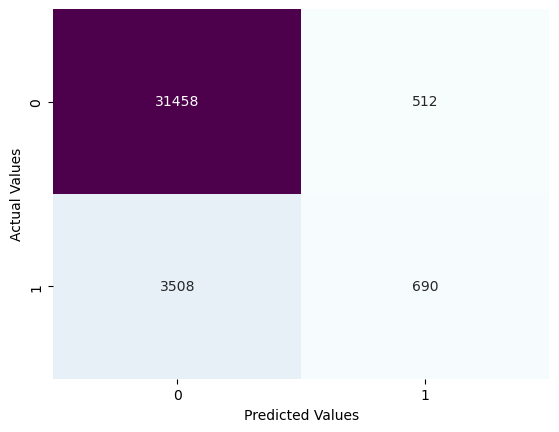

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31970
           1       0.57      0.16      0.26      4198

    accuracy                           0.89     36168
   macro avg       0.74      0.57      0.60     36168
weighted avg       0.86      0.89      0.86     36168

Accuracy of the model:  0.8888520238885202


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_train,Y_train_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_train,Y_train_pred))

acc=accuracy_score(Y_train,Y_train_pred)
print("Accuracy of the model: ",acc)

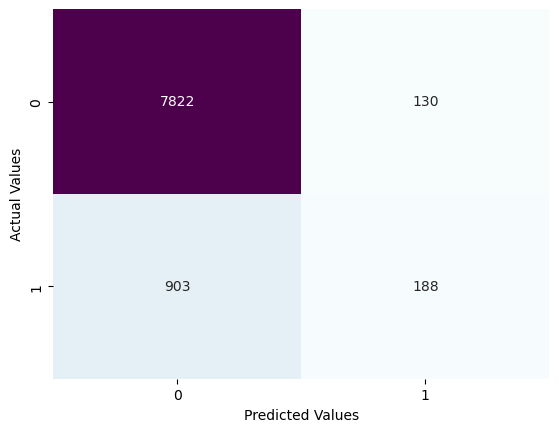

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.17      0.27      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043

Accuracy of the model:  0.8857679973460135


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier(criterion="entropy",max_depth=15,random_state=10)
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

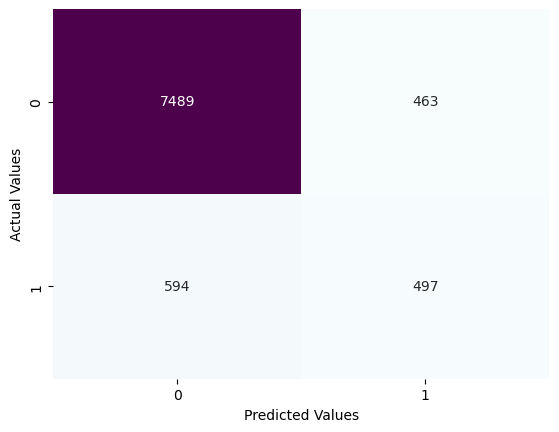

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7952
           1       0.52      0.46      0.48      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.70      0.71      9043
weighted avg       0.88      0.88      0.88      9043

Accuracy of the model:  0.8831140108371116


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


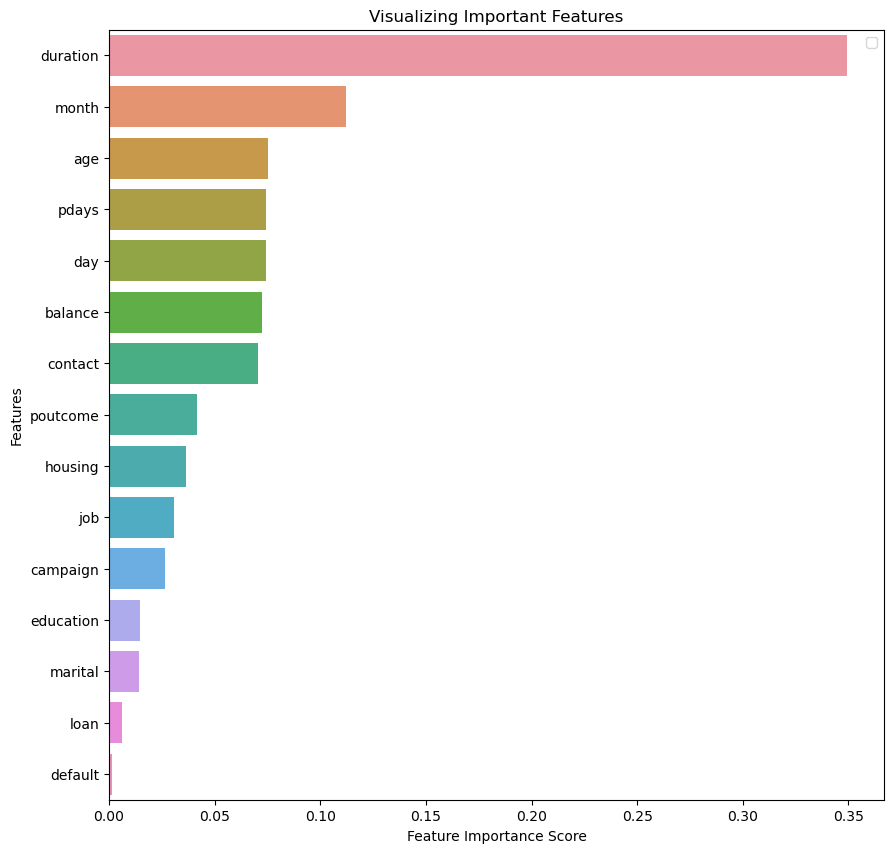

In [37]:
feature_imp = pd.Series(model_DecisionTree.feature_importances_,index=X.columns.tolist()).sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
model_RandomForest=RandomForestClassifier(n_estimators=65,random_state=10)
model_RandomForest.fit(X_train,Y_train)
Y_pred=model_RandomForest.predict(X_test)
Y_train_pred=model_RandomForest.predict(X_train)

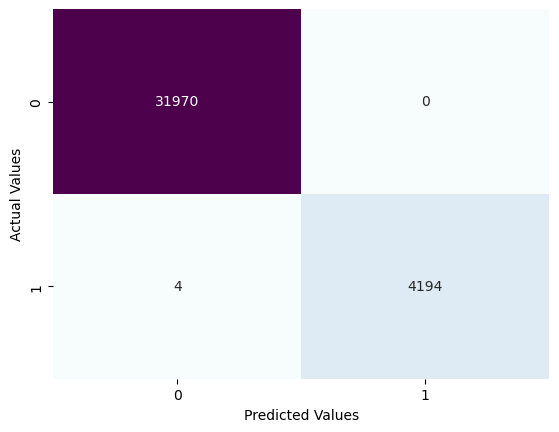

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31970
           1       1.00      1.00      1.00      4198

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168

Accuracy of the model:  0.999889404998894


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_train,Y_train_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_train,Y_train_pred))

acc=accuracy_score(Y_train,Y_train_pred)
print("Accuracy of the model: ",acc)

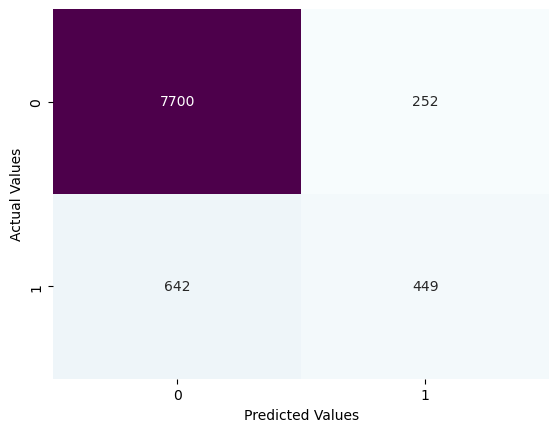

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.64      0.41      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

Accuracy of the model:  0.9011390025434037


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), metric='euclidean')
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

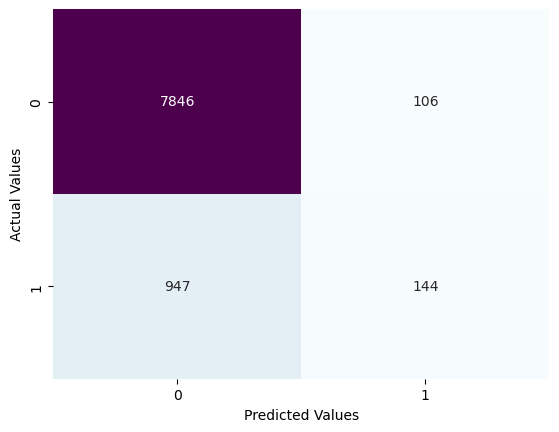

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7952
           1       0.58      0.13      0.21      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.56      0.58      9043
weighted avg       0.85      0.88      0.85      9043

Accuracy of the model:  0.8835563419219286


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### SVC

In [43]:
from sklearn.svm import SVC
SVC_classifier = SVC(kernel='rbf',gamma=0.1,C=1)
SVC_classifier.fit(X_train,Y_train)
Y_pred = SVC_classifier.predict(X_test)

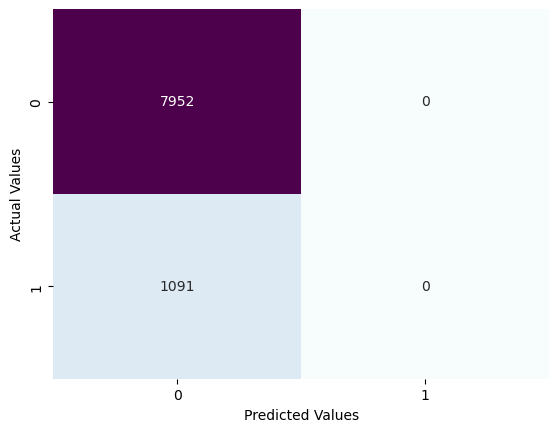

Classification report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043

Accuracy of the model:  0.8793541966161672


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### Extra Trees Classifier

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
model_ExtraTrees = ExtraTreesClassifier(n_estimators=50,random_state=10)
model_ExtraTrees.fit(X_train,Y_train)
Y_pred = model_ExtraTrees.predict(X_test)

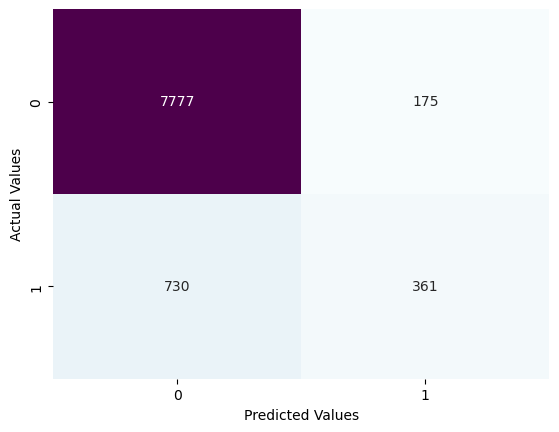

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7952
           1       0.67      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.65      0.69      9043
weighted avg       0.89      0.90      0.88      9043

Accuracy of the model:  0.899922592060157


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)


### Ada Boost Classifier

In [47]:
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state=10), n_estimators=200, random_state=10)
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

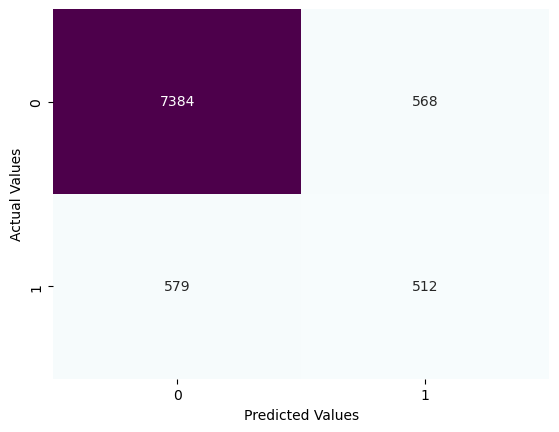

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.47      0.47      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043

Accuracy of the model:  0.8731615614287294


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### XGB Classifier

In [49]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=1000, random_state=10)
model_XGBoost.fit(X_train,Y_train)
Y_pred=model_XGBoost.predict(X_test)

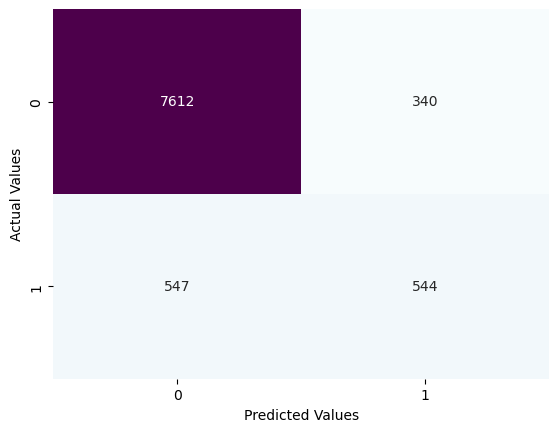

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7952
           1       0.62      0.50      0.55      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.73      0.75      9043
weighted avg       0.89      0.90      0.90      9043

Accuracy of the model:  0.9019130819418335


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

# Advanced EDA and Pre Processing

In [105]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,Term Deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5.0,may,261,1,-1,unknown,not subscribed
1,44,technician,single,secondary,no,29,yes,no,unknown,5.0,may,151,1,-1,unknown,not subscribed
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5.0,may,76,1,-1,unknown,not subscribed
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5.0,may,92,1,-1,unknown,not subscribed
4,33,unknown,single,unknown,no,1,no,no,unknown,5.0,may,198,1,-1,unknown,not subscribed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17.0,nov,977,3,-1,unknown,subscribed
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17.0,nov,456,2,-1,unknown,subscribed
45208,72,retired,married,secondary,no,5715,no,no,cellular,17.0,nov,1127,5,184,success,subscribed
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17.0,nov,508,4,-1,unknown,not subscribed


In [106]:
for i in df1.columns:
    print(i,":",df1[i].unique())
    print("\n")

age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]


job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


marital : ['married' 'single' 'divorced']


education : ['tertiary' 'secondary' 'unknown' 'primary']


default : ['no' 'yes']


balance : [ 2143    29     2 ...  8205 14204 16353]


housing : ['yes' 'no']


loan : ['no' 'yes']


contact : ['unknown' 'cellular' 'telephone']


day : [ 5. 16.  6.  7.  8.  9. 12. 13. 14. 15. 19. 20. 21. 23. 26. 27. 28. 29.
 30.  2.  3.  4. 11. 17. 18. 24. 25.  1. 10. 22. 31.]


month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


duration : [ 261  151   76 ... 1298 1246 1556]


campaign : [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 

In [107]:
continious_columns = ["balance","duration"]

In [108]:
discrete_columns = []
for i in df1.columns:
    if i not in continious_columns and i != "Term Deposit":
        discrete_columns.append(i)
len(discrete_columns)

13

### Outliers

Axes(0.125,0.11;0.775x0.77)


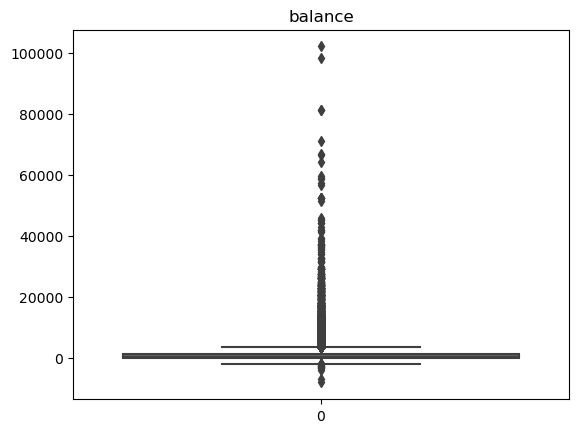

Axes(0.125,0.11;0.775x0.77)


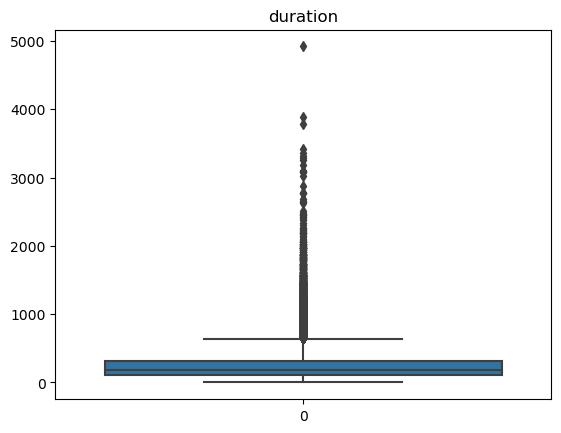

In [109]:
for i in continious_columns:
    print(sns.boxplot(df1[i]))
    plt.title(i)
    plt.show()

In [110]:
for i in continious_columns:
    Q1=df1[i].quantile(0.25)
    Q3=df1[i].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df1=df1[(df1[i]>=lower) & (df1[i]<=upper)]
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,Term Deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5.0,may,261,1,-1,unknown,not subscribed
1,44,technician,single,secondary,no,29,yes,no,unknown,5.0,may,151,1,-1,unknown,not subscribed
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5.0,may,76,1,-1,unknown,not subscribed
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5.0,may,92,1,-1,unknown,not subscribed
4,33,unknown,single,unknown,no,1,no,no,unknown,5.0,may,198,1,-1,unknown,not subscribed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17.0,nov,300,1,40,failure,subscribed
45205,25,technician,single,secondary,no,505,no,yes,cellular,17.0,nov,386,2,-1,unknown,subscribed
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17.0,nov,456,2,-1,unknown,subscribed
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17.0,nov,508,4,-1,unknown,not subscribed


### Dependency Test

### Dependency test for independent variables(categorical) with independent variables(categorical) - (Chi2)

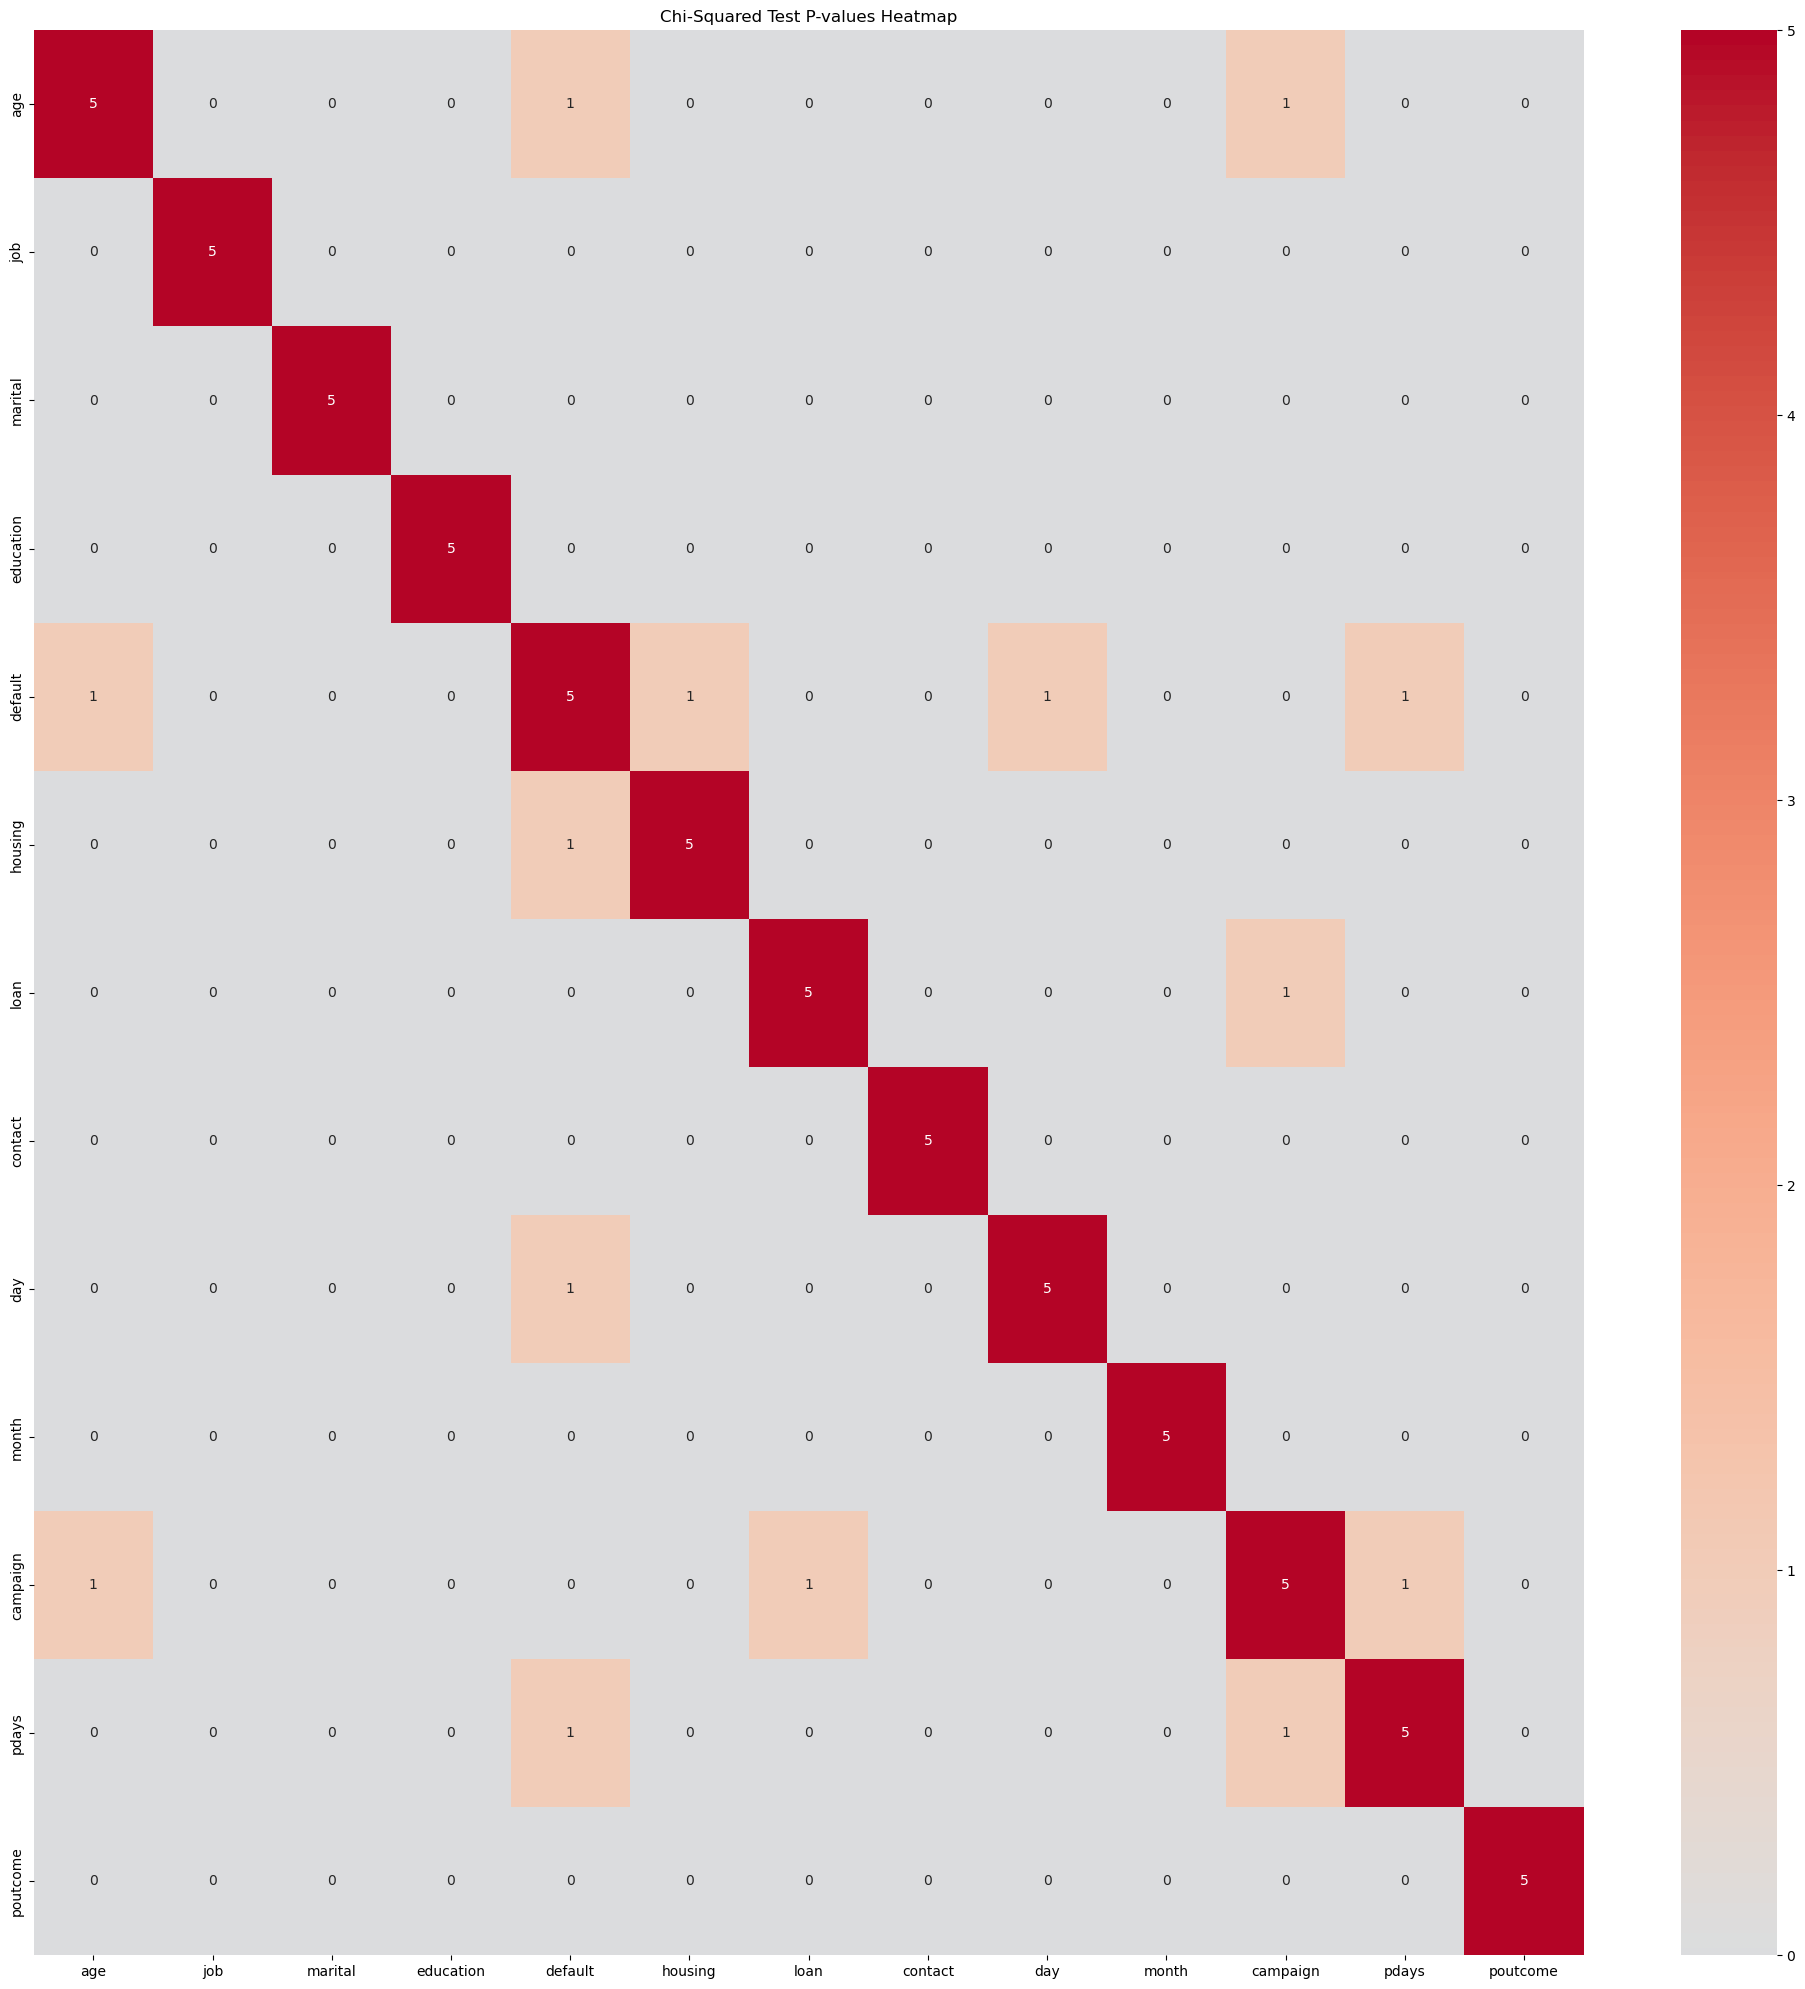

In [111]:
from scipy.stats import chi2_contingency
df2=df1[discrete_columns]
a=df2.shape[1]
p_values_matrix = np.zeros((a, a))
chi2_dependent_features=[]
for i in range(a):
    for j in range(a):
        contingency_table = pd.crosstab(df2.iloc[:,i], df2.iloc[:,j])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if i==j:
            p_values_matrix[i, j] = 5
            p_values_matrix[j, i] = 5
        else:
            if p<0.05:
                chi2_dependent_features.append(df2.columns[i])
                chi2_dependent_features.append(df2.columns[j])
                p_values_matrix[i, j] = 0
                p_values_matrix[j, i] = 0
            else:
                p_values_matrix[i, j] = 1
                p_values_matrix[j, i] = 1

p_values_df = pd.DataFrame(p_values_matrix, columns=df2.columns, index=df2.columns)

plt.figure(figsize=(25, 25))
sns.heatmap(p_values_df, annot=True, cmap='coolwarm', cbar=True, center=0.05)
plt.title('Chi-Squared Test P-values Heatmap')
plt.show()

##### 0 means dependent and we can see that default and campaign features are dependent on other features

In [112]:
df1.drop(["default", "campaign"], axis=1, inplace=True)

### Dependency test for independent variables(numerical) with independent variables(numerical) - (correlation)

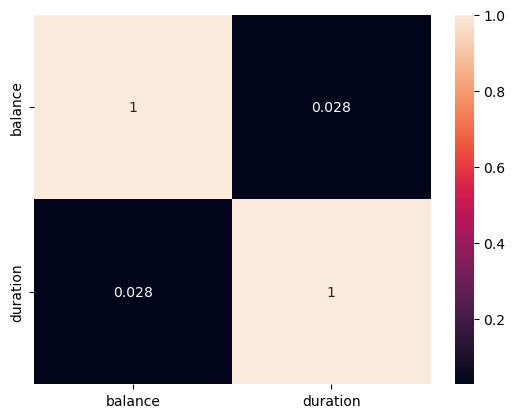

In [113]:
sns.heatmap(df1[continious_columns].corr(), annot=True)
plt.show()

##### We can see that no column is dependent on other column

In [114]:
df2=df1.copy()

In [115]:
df1

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,pdays,poutcome,Term Deposit
0,58,management,married,tertiary,2143,yes,no,unknown,5.0,may,261,-1,unknown,not subscribed
1,44,technician,single,secondary,29,yes,no,unknown,5.0,may,151,-1,unknown,not subscribed
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5.0,may,76,-1,unknown,not subscribed
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5.0,may,92,-1,unknown,not subscribed
4,33,unknown,single,unknown,1,no,no,unknown,5.0,may,198,-1,unknown,not subscribed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,2850,no,no,cellular,17.0,nov,300,40,failure,subscribed
45205,25,technician,single,secondary,505,no,yes,cellular,17.0,nov,386,-1,unknown,subscribed
45207,71,retired,divorced,primary,1729,no,no,cellular,17.0,nov,456,-1,unknown,subscribed
45209,57,blue-collar,married,secondary,668,no,no,telephone,17.0,nov,508,-1,unknown,not subscribed


In [116]:
df1.reset_index(drop=True, inplace=True)

In [117]:
df1

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,pdays,poutcome,Term Deposit
0,58,management,married,tertiary,2143,yes,no,unknown,5.0,may,261,-1,unknown,not subscribed
1,44,technician,single,secondary,29,yes,no,unknown,5.0,may,151,-1,unknown,not subscribed
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5.0,may,76,-1,unknown,not subscribed
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5.0,may,92,-1,unknown,not subscribed
4,33,unknown,single,unknown,1,no,no,unknown,5.0,may,198,-1,unknown,not subscribed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37567,73,retired,married,secondary,2850,no,no,cellular,17.0,nov,300,40,failure,subscribed
37568,25,technician,single,secondary,505,no,yes,cellular,17.0,nov,386,-1,unknown,subscribed
37569,71,retired,divorced,primary,1729,no,no,cellular,17.0,nov,456,-1,unknown,subscribed
37570,57,blue-collar,married,secondary,668,no,no,telephone,17.0,nov,508,-1,unknown,not subscribed


### Age Distribution

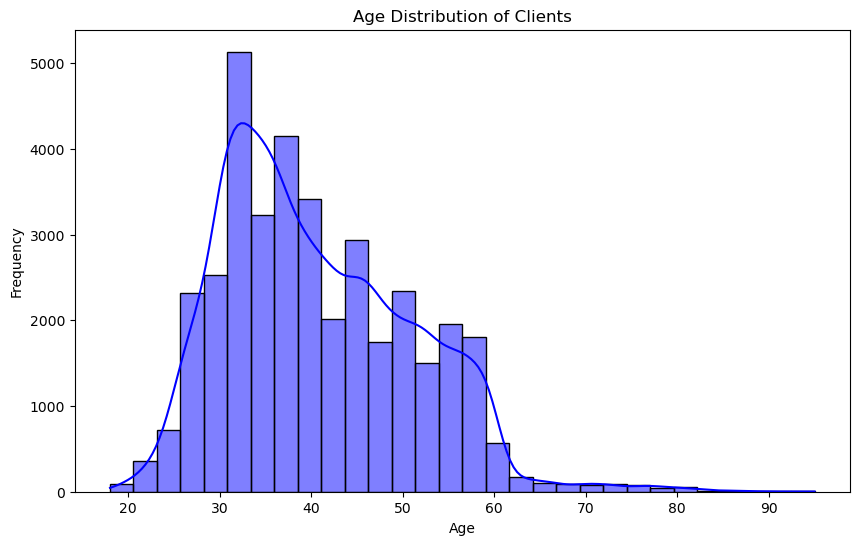

In [118]:
plt.figure(figsize=(10,6))
sns.histplot(df1['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of clients' ages. It reveals that most clients are between 25 and 60 years old, with a peak around the age of 35-40.

### Job distribution

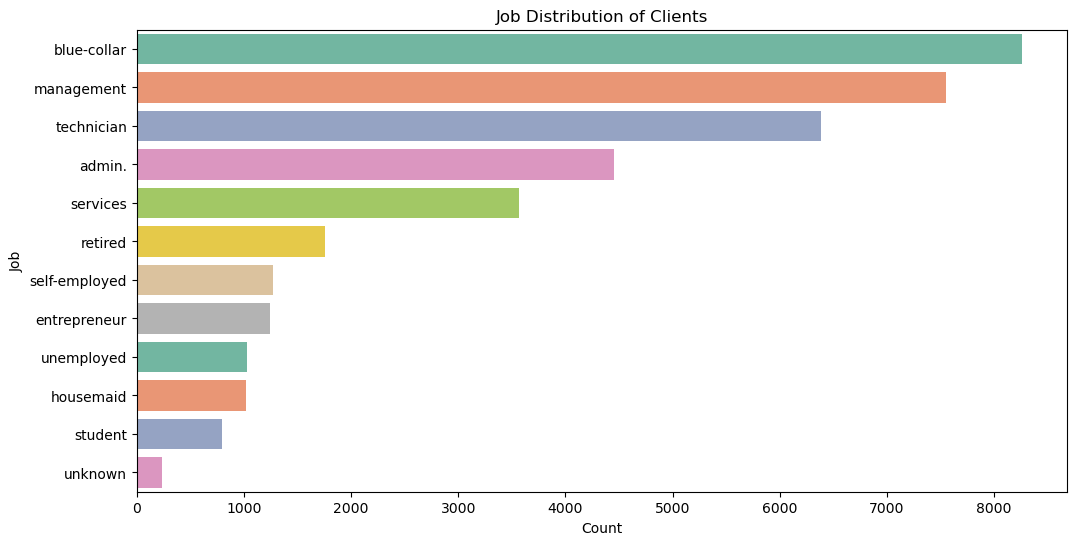

In [119]:
plt.figure(figsize=(12,6))
sns.countplot(y='job', data=df1, order=df1['job'].value_counts().index, palette="Set2")
plt.title('Job Distribution of Clients')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

The bar plot shows the job distribution. The most common professions among clients are "blue-collar," "management," and "technician."

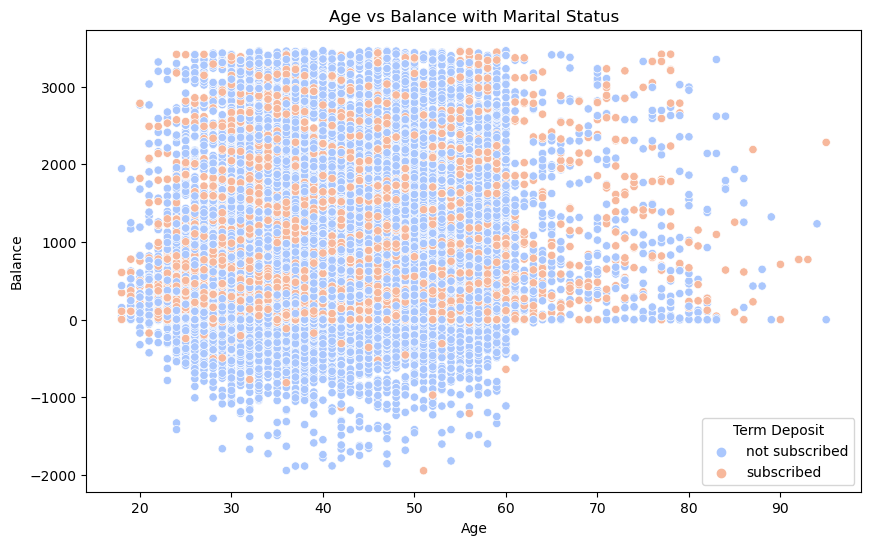

In [122]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='age', y='balance', hue='Term Deposit', palette='coolwarm')
plt.title('Age vs Balance with Term Deposit')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

In [181]:
categorical_columns=["marital","housing","loan","contact"]

In [182]:
target=df1["Term Deposit"].values

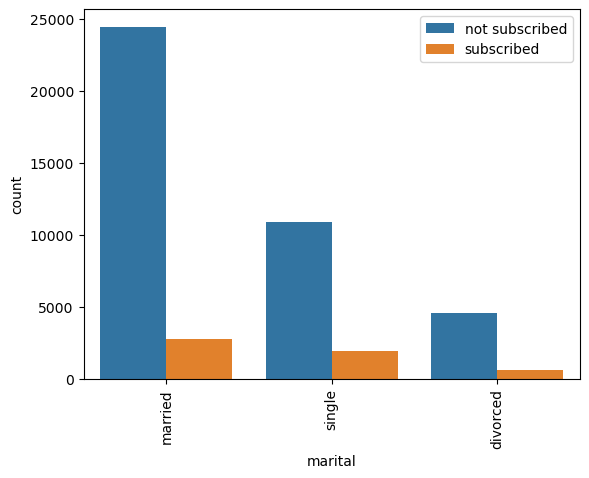

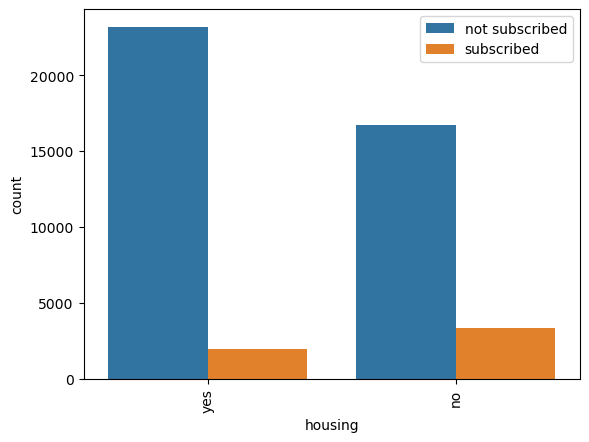

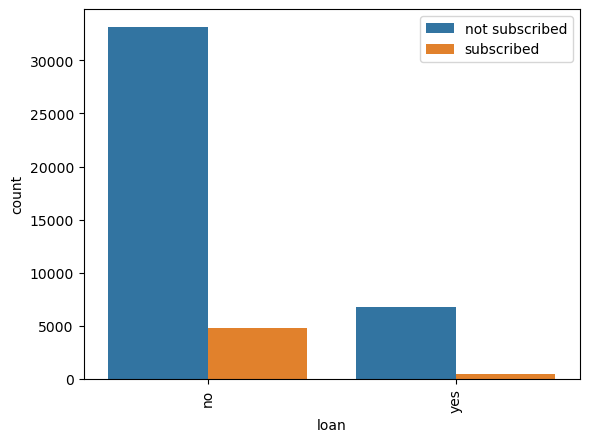

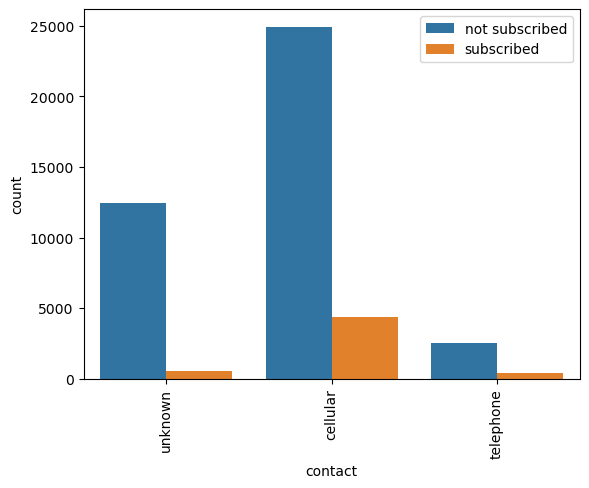

In [183]:
for i in categorical_columns:
    sns.countplot(x=i, hue=target, data=df1)
    plt.xticks(rotation=90) 
    plt.show()  

# Encoding

In [126]:
df1.dtypes

age               int64
job              object
marital          object
education        object
balance           int64
housing          object
loan             object
contact          object
day             float64
month            object
duration          int64
pdays             int64
poutcome         object
Term Deposit     object
dtype: object

In [127]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in df1.select_dtypes(include="object").columns:
    if i not in ["Term Deposit"]:
        df1[i]=le.fit_transform(df1[i])

In [128]:
df1["Term Deposit"] = df1["Term Deposit"].replace({"not subscribed":0, "subscribed":1})

# Train Test Split

In [129]:
X = df1.iloc[:,0:-1]
Y = df1.iloc[:,-1]

In [130]:
print(X.shape)
print(Y.shape)

(37572, 13)
(37572,)


In [131]:
from sklearn.model_selection import train_test_split  

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [132]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(30057, 13)
(30057,)
(7515, 13)
(7515,)


# Feature Selection

### SelectPercentile with Mutual Information(Information Gain)

In [133]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_classif, percentile=80)
selected_top_columns.fit(X_train, Y_train)

feature_scores = selected_top_columns.scores_
selected_features = X_train.columns[selected_top_columns.get_support()]
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_scores})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature importance scores:")
print(feature_importance_df)

X_train = selected_top_columns.transform(X_train)
X_test = selected_top_columns.transform(X_test)

Feature importance scores:
      Feature  Importance
12   poutcome    0.038792
10   duration    0.032316
9       month    0.031508
11      pdays    0.030295
4     balance    0.021522
5     housing    0.017904
7     contact    0.017704
1         job    0.013093
0         age    0.012079
8         day    0.006885
3   education    0.005458
6        loan    0.004862
2     marital    0.001381


In [134]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [135]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(30057, 10)
(30057,)
(7515, 10)
(7515,)


# Scaling  (X variables)

In [136]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Balancing Data

In [137]:
Y_train.value_counts(normalize=True)

Term Deposit
0    0.918488
1    0.081512
Name: proportion, dtype: float64

In [138]:
import pandas as pd
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=54)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

print("Class distribution after SMOTE:")
print(Y_train.value_counts(normalize=True))

Class distribution after SMOTE:
Term Deposit
0    0.5
1    0.5
Name: proportion, dtype: float64


# Modelling

In [139]:
score_card = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'f1 score'])
from sklearn import metrics
def updateScoreCardTrain(score_card, model_name):
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [metrics.accuracy_score(Y_train, train_pred)],
        'Precision': [metrics.precision_score(Y_train, train_pred, average = "micro")],
        'Recall': [metrics.recall_score(Y_train, train_pred, average = "micro")],
        'f1 score': [metrics.f1_score(Y_train, train_pred, average = "micro")]
    })

    score_card = pd.concat([score_card, new_row], ignore_index=True)
    return score_card

def updateScoreCardTest(score_card, model_name):
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [metrics.accuracy_score(Y_test, test_pred)],
        'Precision': [metrics.precision_score(Y_test, test_pred, average = "micro")],
        'Recall': [metrics.recall_score(Y_test, test_pred, average = "micro")],
        'f1 score': [metrics.f1_score(Y_test, test_pred, average = "micro")]
    })

    score_card = pd.concat([score_card, new_row], ignore_index=True)
    return score_card

### Logistic Regression:

In [140]:
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression()
LR_classifier.fit(X_train,Y_train)

train_pred=LR_classifier.predict(X_train)
test_pred=LR_classifier.predict(X_test)


score_card = updateScoreCardTrain(score_card, 'LogisticTrain')
score_card = updateScoreCardTest(score_card, 'LogisticTest')
score_card

,Model,Accuracy,Precision,Recall,f1 score
0,LogisticTrain,0.776017,0.776017,0.776017,0.776017
1,LogisticTest,0.774983,0.774983,0.774983,0.774983


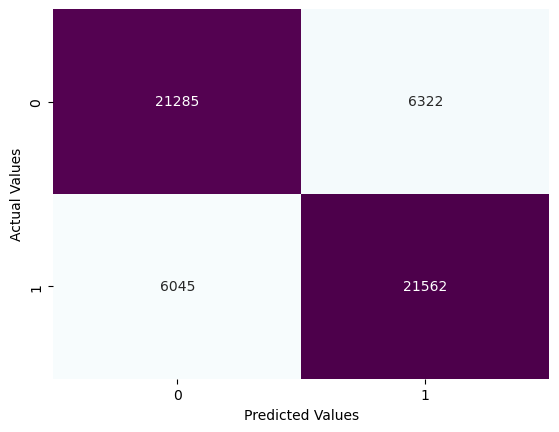

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77     27607
           1       0.77      0.78      0.78     27607

    accuracy                           0.78     55214
   macro avg       0.78      0.78      0.78     55214
weighted avg       0.78      0.78      0.78     55214

Accuracy of the model:  0.7760169522222625


In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_train,train_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_train,train_pred))

acc=accuracy_score(Y_train,train_pred)
print("Accuracy of the model: ",acc)

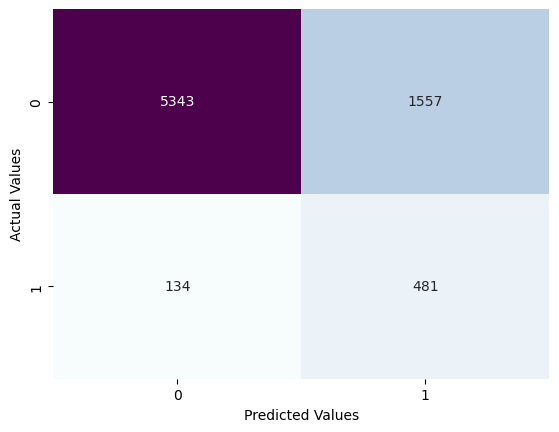

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      6900
           1       0.24      0.78      0.36       615

    accuracy                           0.77      7515
   macro avg       0.61      0.78      0.61      7515
weighted avg       0.92      0.77      0.82      7515

Accuracy of the model:  0.7749833666001331


In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,test_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,test_pred))

acc=accuracy_score(Y_test,test_pred)
print("Accuracy of the model: ",acc)

### Decision Tree Classifier

In [143]:
from sklearn.tree import DecisionTreeClassifier

DCT=DecisionTreeClassifier()
DCT.fit(X_train,Y_train)

train_pred=DCT.predict(X_train)
test_pred=DCT.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'DecisionTreeTrain')
score_card = updateScoreCardTest(score_card, 'DecisionTreeTest')
score_card

,Model,Accuracy,Precision,Recall,f1 score
0,LogisticTrain,0.776017,0.776017,0.776017,0.776017
1,LogisticTest,0.774983,0.774983,0.774983,0.774983
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.892083,0.892083,0.892083,0.892083


### Random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(n_estimators=3,random_state=42, n_jobs=-1, oob_score=True)
rfc.fit(X_train,Y_train)

train_pred=rfc.predict(X_train)
test_pred=rfc.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'RandomForestTrain')
score_card = updateScoreCardTest(score_card, 'RandomForestTest')
score_card

,Model,Accuracy,Precision,Recall,f1 score
0,LogisticTrain,0.776017,0.776017,0.776017,0.776017
1,LogisticTest,0.774983,0.774983,0.774983,0.774983
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.892083,0.892083,0.892083,0.892083
4,RandomForestTrain,0.990763,0.990763,0.990763,0.990763
5,RandomForestTest,0.902196,0.902196,0.902196,0.902196


### KNN Classifier

In [145]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), metric='euclidean')
model_KNN.fit(X_train,Y_train)

train_pred=rfc.predict(X_train)
test_pred=rfc.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'KNNTrain')
score_card = updateScoreCardTest(score_card, 'KNNTest')
score_card

,Model,Accuracy,Precision,Recall,f1 score
0,LogisticTrain,0.776017,0.776017,0.776017,0.776017
1,LogisticTest,0.774983,0.774983,0.774983,0.774983
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.892083,0.892083,0.892083,0.892083
4,RandomForestTrain,0.990763,0.990763,0.990763,0.990763
5,RandomForestTest,0.902196,0.902196,0.902196,0.902196
6,KNNTrain,0.990763,0.990763,0.990763,0.990763
7,KNNTest,0.902196,0.902196,0.902196,0.902196


### SVM Classifier

In [146]:
from sklearn.svm import SVC
SVC_classifier = SVC(kernel='rbf',gamma=0.1,C=1)
SVC_classifier.fit(X_train,Y_train)

train_pred=rfc.predict(X_train)
test_pred=rfc.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'SVCTrain')
score_card = updateScoreCardTest(score_card, 'SVCTest')
score_card

,Model,Accuracy,Precision,Recall,f1 score
0,LogisticTrain,0.776017,0.776017,0.776017,0.776017
1,LogisticTest,0.774983,0.774983,0.774983,0.774983
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.892083,0.892083,0.892083,0.892083
4,RandomForestTrain,0.990763,0.990763,0.990763,0.990763
5,RandomForestTest,0.902196,0.902196,0.902196,0.902196
6,KNNTrain,0.990763,0.990763,0.990763,0.990763
7,KNNTest,0.902196,0.902196,0.902196,0.902196
8,SVCTrain,0.990763,0.990763,0.990763,0.990763
9,SVCTest,0.902196,0.902196,0.902196,0.902196


### ExtraTrees Classifier

In [147]:
from sklearn.ensemble import ExtraTreesClassifier
model_ExtraTrees = ExtraTreesClassifier(n_estimators=50,random_state=10)
model_ExtraTrees.fit(X_train,Y_train)

train_pred=model_ExtraTrees.predict(X_train)
test_pred=model_ExtraTrees.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'ExtraTreeTrain')
score_card = updateScoreCardTest(score_card, 'ExtraTreeTest')
score_card

,Model,Accuracy,Precision,Recall,f1 score
0,LogisticTrain,0.776017,0.776017,0.776017,0.776017
1,LogisticTest,0.774983,0.774983,0.774983,0.774983
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.892083,0.892083,0.892083,0.892083
4,RandomForestTrain,0.990763,0.990763,0.990763,0.990763
5,RandomForestTest,0.902196,0.902196,0.902196,0.902196
6,KNNTrain,0.990763,0.990763,0.990763,0.990763
7,KNNTest,0.902196,0.902196,0.902196,0.902196
8,SVCTrain,0.990763,0.990763,0.990763,0.990763
9,SVCTest,0.902196,0.902196,0.902196,0.902196


### Ada Boost Classifier

In [148]:
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10), n_estimators=200, random_state=10)
model_AdaBoost.fit(X_train,Y_train)

train_pred=model_AdaBoost.predict(X_train)
test_pred=model_AdaBoost.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'AdaBoostTrain')
score_card = updateScoreCardTest(score_card, 'AdaBoostTest')
score_card

,Model,Accuracy,Precision,Recall,f1 score
0,LogisticTrain,0.776017,0.776017,0.776017,0.776017
1,LogisticTest,0.774983,0.774983,0.774983,0.774983
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.892083,0.892083,0.892083,0.892083
4,RandomForestTrain,0.990763,0.990763,0.990763,0.990763
5,RandomForestTest,0.902196,0.902196,0.902196,0.902196
6,KNNTrain,0.990763,0.990763,0.990763,0.990763
7,KNNTest,0.902196,0.902196,0.902196,0.902196
8,SVCTrain,0.990763,0.990763,0.990763,0.990763
9,SVCTest,0.902196,0.902196,0.902196,0.902196


### XGB Classifier

In [149]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=100, random_state=10)
model_XGBoost.fit(X_train,Y_train)

train_pred=model_XGBoost.predict(X_train)
test_pred=model_XGBoost.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'XGBoostTrain')
score_card = updateScoreCardTest(score_card, 'XGBoostTest')
score_card

,Model,Accuracy,Precision,Recall,f1 score
0,LogisticTrain,0.776017,0.776017,0.776017,0.776017
1,LogisticTest,0.774983,0.774983,0.774983,0.774983
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.892083,0.892083,0.892083,0.892083
4,RandomForestTrain,0.990763,0.990763,0.990763,0.990763
5,RandomForestTest,0.902196,0.902196,0.902196,0.902196
6,KNNTrain,0.990763,0.990763,0.990763,0.990763
7,KNNTest,0.902196,0.902196,0.902196,0.902196
8,SVCTrain,0.990763,0.990763,0.990763,0.990763
9,SVCTest,0.902196,0.902196,0.902196,0.902196


### ANN

In [150]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [151]:
X_train.shape

(55214, 10)

In [155]:
model = Sequential()

model.add(Dense(128,activation = "relu", input_dim=10))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))

model.add(Dense(1, activation = "sigmoid"))

In [156]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
model.compile(optimizer= 'adam',loss= "binary_crossentropy", metrics= ['accuracy'])
earlystopping = EarlyStopping(monitor='val_loss', patience=5)
ann_model = model.fit(X_train, Y_train, batch_size = 16, epochs = 2, validation_data=(X_test, Y_test), callbacks=[earlystopping])

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8061 - loss: 0.4239 - val_accuracy: 0.7975 - val_loss: 0.3993
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8447 - loss: 0.3489 - val_accuracy: 0.8226 - val_loss: 0.3560


In [158]:
model.evaluate(X_test, Y_test)

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.8161 - loss: 0.3616


[0.35595038533210754, 0.8226214051246643]

In [159]:
test_pred = model.predict(X_test)
test_pred = np.round(test_pred)
train_pred = model.predict(X_train)
train_pred = np.round(train_pred)

score_card = updateScoreCardTrain(score_card, 'ANNTrain')
score_card = updateScoreCardTest(score_card, 'ANNTest')
score_card

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step


,Model,Accuracy,Precision,Recall,f1 score
0,LogisticTrain,0.776017,0.776017,0.776017,0.776017
1,LogisticTest,0.774983,0.774983,0.774983,0.774983
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.892083,0.892083,0.892083,0.892083
4,RandomForestTrain,0.990763,0.990763,0.990763,0.990763
5,RandomForestTest,0.902196,0.902196,0.902196,0.902196
6,KNNTrain,0.990763,0.990763,0.990763,0.990763
7,KNNTest,0.902196,0.902196,0.902196,0.902196
8,SVCTrain,0.990763,0.990763,0.990763,0.990763
9,SVCTest,0.902196,0.902196,0.902196,0.902196


# Hyperparameter Tuning Technique

### GridSearch CV

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=10)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9667295697412314


In [103]:
train_pred=grid_search.predict(X_train)
test_pred=grid_search.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'RFC_HPT_Train')
score_card = updateScoreCardTest(score_card, 'RFC_HPT_Test')
score_card

,Model,Accuracy,Precision,Recall,f1 score
0,LogisticTrain,0.791647,0.791647,0.791647,0.791647
1,LogisticTest,0.780040,0.780040,0.780040,0.780040
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.895010,0.895010,0.895010,0.895010
4,RandomForestTrain,0.990763,0.990763,0.990763,0.990763
5,RandomForestTest,0.902329,0.902329,0.902329,0.902329
6,KNNTrain,0.990763,0.990763,0.990763,0.990763
7,KNNTest,0.902329,0.902329,0.902329,0.902329
8,SVCTrain,0.990763,0.990763,0.990763,0.990763
9,SVCTest,0.902329,0.902329,0.902329,0.902329
